<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<a href="javascript:code_toggle()">Show/Hide Code</a>.

In [1]:
%run "../../shared/utilz_image_proc.ipynb"

# 1. Grain Analysis on mutliple files using watershed segmentation
- follows from `notebook 007`

In [2]:
## clean, segment using watershed and generate properties
kern = np.ones( (3,3), dtype=np.uint8 )

pixels_to_um = 0.5 

radianz = 57.2958



------- Orignial Color -------
image.shape = (524, 768, 3)
datatype = uint8
min = 0 , max = 255


------- Original Gray -------
image.shape = (524, 768)
datatype = uint8
min = 0 , max = 255



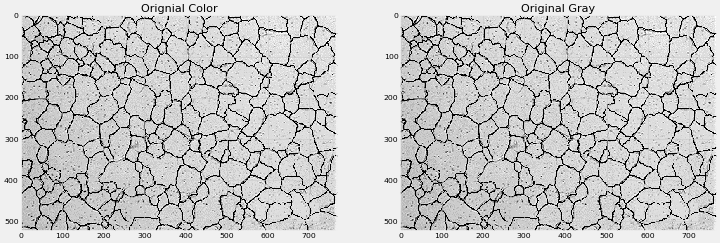

In [3]:
ip = "https://4.bp.blogspot.com/_6sy6DITvP_s/TKbdzLMBH5I/AAAAAAAABmw/1M8z5xwIcno/s1600/505h.JPG"
img, gimg = fetch_image( ip )
grid_plot_images( [img, gimg], ["Orignial Color", "Original Gray"])


------- Grain Image 0 -------
image.shape = (524, 768, 3)
datatype = uint8
min = 0 , max = 255


------- Grain Image 1 -------
image.shape = (201, 251, 3)
datatype = uint8
min = 0 , max = 255


------- Grain Image 2 -------
image.shape = (180, 280, 3)
datatype = uint8
min = 0 , max = 255


------- Grain Image 3 -------
image.shape = (198, 255, 3)
datatype = uint8
min = 0 , max = 255



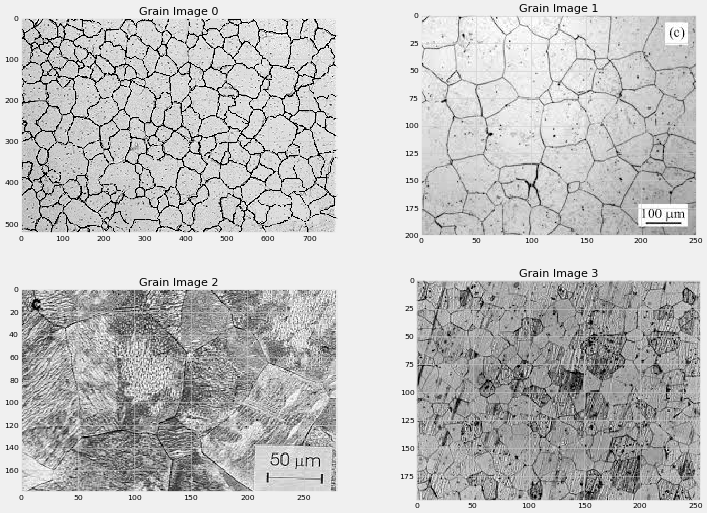

In [4]:
many_imagez = [
    "https://4.bp.blogspot.com/_6sy6DITvP_s/TKbdzLMBH5I/AAAAAAAABmw/1M8z5xwIcno/s1600/505h.JPG",
    "https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcS0MR_ogy4X74rL4Q5DX6bTybb--rvWbeXaiV7AkWyTcV3CMpkB&usqp=CAU",
    "https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcTCt_Cp3aKgkzxrBSJzO0lJYNlfR4xfSo_TzJAIHQCjeHlbaWBG&usqp=CAU",
    "https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcTi79GdDDRQMqyXRoPppO0UZScL4kAioE23tsHW7IWY6_UZbOn-&usqp=CAU",
    
]


origi_and_gray_imagez = {}

for i, ip in enumerate(many_imagez):
    c, g = fetch_image( ip )
    origi_and_gray_imagez[f"Grain Image {i}"] = (c, g )
    

grid_plot_images( [x[0] for x in origi_and_gray_imagez.values() ], list(origi_and_gray_imagez.keys()) )


------- Grain Image 0 -------
image.shape = (524, 768)
datatype = uint8
min = 0 , max = 255


------- Grain Image 1 -------
image.shape = (201, 251)
datatype = uint8
min = 0 , max = 255


------- Grain Image 2 -------
image.shape = (180, 280)
datatype = uint8
min = 0 , max = 255


------- Grain Image 3 -------
image.shape = (198, 255)
datatype = uint8
min = 0 , max = 255



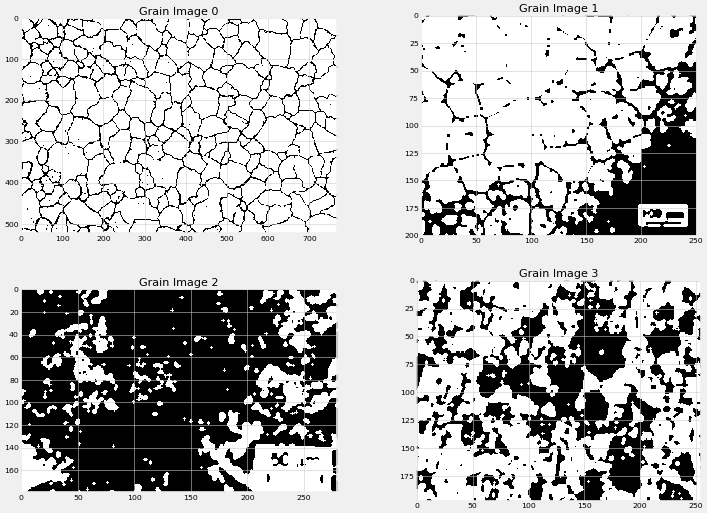

In [5]:
### 1. Clean Imagez
for k, g in origi_and_gray_imagez.items(): # 0 = color, 1 = grayscale 
    o = clean_prepare_binary(g[1])
    origi_and_gray_imagez[k] = [*g, o ]
    
grid_plot_images( [ x[2] for x in origi_and_gray_imagez.values()] , list(origi_and_gray_imagez.keys()) )


------- Grain Image 0 -------
image.shape = (524, 768, 3)
datatype = float64
min = 0.0 , max = 1.0


------- Grain Image 1 -------
image.shape = (201, 251, 3)
datatype = float64
min = 0.0 , max = 1.0


------- Grain Image 2 -------
image.shape = (180, 280, 3)
datatype = float64
min = 0.0 , max = 1.0


------- Grain Image 3 -------
image.shape = (198, 255, 3)
datatype = float64
min = 0.0 , max = 1.0



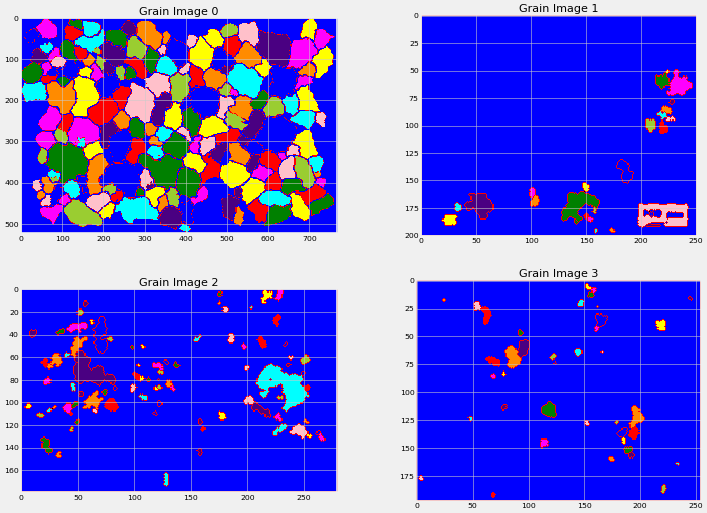

In [6]:
### 2. Watershed segment
for k, g in origi_and_gray_imagez.items(): # 0 = color, 1 = grayscale 
    o, r = watershed_segment(g[0], g[2])
    origi_and_gray_imagez[k] = [*g, (o,r)]
    
grid_plot_images( [ x[3][1] for x in origi_and_gray_imagez.values()] , list(origi_and_gray_imagez.keys()) )


In [7]:
### 3. Generate properties dataframe
df_propz = []
for k, g in origi_and_gray_imagez.items():
    df_propz.append( *gen_properties( g[3][0], g[1]))
#     print( ">>>>", df_propz, "\n\n")
    
grain_analysis_df = pd.DataFrame.from_records( df_propz , columns=region_propz+propz_addz)

print( grain_analysis_df.shape )

grain_analysis_df.head(3)

(4, 16)


,Label,Area,Perimeter,equivalent_diameter,orientation,MajorAxisLength,MinorAxisLength,MinIntensity,MaxIntensity,MeanIntensity,Area_nm,Perimeter_nm,equivalent_diameter_nm,orientation_degrees,MajorAxisLength_nm,MinorAxisLength_nm
0,186,314,75.461941,19.994930,1.216161,25.202625,16.696898,56,255,204.939490,78.50,37.730970,9.997465,69.680925,12.601312,8.348449
1,36,5,5.207107,2.523133,-0.321751,3.098387,1.788854,193,196,194.400000,1.25,2.603553,1.261566,-18.434955,1.549193,0.894427
2,96,38,28.142136,6.955796,-0.001036,12.867970,3.990273,147,241,188.894737,9.50,14.071068,3.477898,-0.059387,6.433985,1.995136


In [8]:
np.round(grain_analysis_df.describe() , 1)

,Label,Area,Perimeter,equivalent_diameter,orientation,MajorAxisLength,MinorAxisLength,MinIntensity,MaxIntensity,MeanIntensity,Area_nm,Perimeter_nm,equivalent_diameter_nm,orientation_degrees,MajorAxisLength_nm,MinorAxisLength_nm
count,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0
mean,91.8,91.0,28.9,8.1,0.2,11.0,6.3,133.8,221.5,188.7,22.8,14.5,4.1,12.8,5.5,3.2
std,67.9,149.4,32.7,8.2,0.7,10.5,7.0,57.0,31.1,16.2,37.4,16.4,4.1,38.9,5.3,3.5
min,36.0,5.0,5.2,2.5,-0.3,3.0,1.8,56.0,194.0,166.6,1.2,2.6,1.3,-18.4,1.5,0.9
25%,45.8,6.5,6.4,2.9,-0.1,3.1,2.5,118.2,195.5,183.3,1.6,3.2,1.4,-4.7,1.5,1.3
50%,72.5,22.5,17.5,5.0,-0.0,8.0,3.4,143.0,218.5,191.6,5.6,8.7,2.5,-0.0,4.0,1.7
75%,118.5,107.0,40.0,10.2,0.3,16.0,7.2,158.5,244.5,197.0,26.8,20.0,5.1,17.4,8.0,3.6
max,186.0,314.0,75.5,20.0,1.2,25.2,16.7,193.0,255.0,204.9,78.5,37.7,10.0,69.7,12.6,8.3


# 2. Cell Nuclei Analysis using Watershed Segmentation


------- Cell # 0 -------
image.shape = (504, 700, 3)
datatype = uint8
min = 0 , max = 255


------- Cell # 1 -------
image.shape = (368, 508, 3)
datatype = uint8
min = 0 , max = 255


------- Cell # 2 -------
image.shape = (900, 1200, 3)
datatype = uint8
min = 0 , max = 255


------- Cell # 3 -------
image.shape = (194, 259, 3)
datatype = uint8
min = 0 , max = 255


------- Cell # 4 -------
image.shape = (504, 700, 3)
datatype = uint8
min = 0 , max = 255


------- Cell # 5 -------
image.shape = (368, 508, 3)
datatype = uint8
min = 0 , max = 255



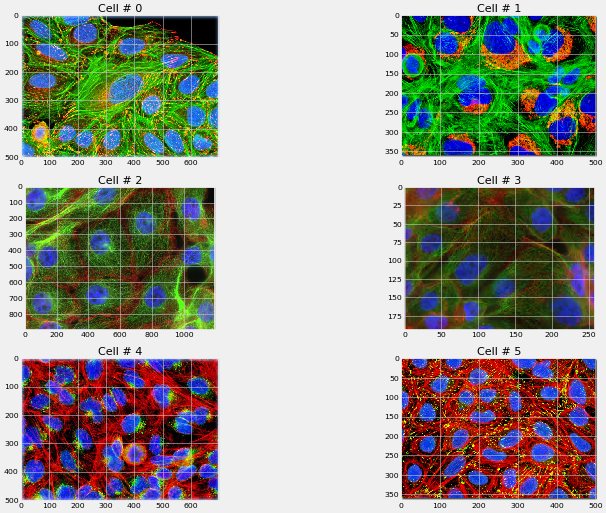

In [9]:
# pathz_cell_imagez = [
#     "https://blog.dana-farber.org/insight/wp-content/uploads/2018/06/nci-vol-9896-72-1.jpg",
#     "https://media.sciencephoto.com/c0/28/78/30/c0287830-800px-wm.jpg",
#     "https://media.sciencephoto.com/image/c0290560/800wm",
#     "https://media.sciencephoto.com/image/c0287829/800wm", 
#     "https://media.sciencephoto.com/image/c0287831/800wm"
    
# ]

pathz_cell_imagez = [
    "https://static5.olympus-lifescience.com/modules/imageresizer/2ed/31f/ae154f0fef/700x504p350x252.jpg",
    "https://micro.magnet.fsu.edu/primer/techniques/fluorescence/gallery/cells/u2/images/u2large.jpg",
    "https://cdn8.dissolve.com/p/D943_211_356/D943_211_356_1200.jpg",
    "https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcQQITWNAK8ICAG5V_GZ5wPlkGomWQlbMM3viB-wMkuOwJ__QDGe&usqp=CAU",
    "https://static4.olympus-lifescience.com/modules/imageresizer/728/360/2c5cd27ed8/700x504p350x252.jpg",
    "https://micro.magnet.fsu.edu/primer/techniques/fluorescence/gallery/cells/u2/images/u2large14.jpg",
    
]

dict_cell_imagez = {}

for i, ip in enumerate(pathz_cell_imagez):
    c, g = fetch_image( ip )
    dict_cell_imagez[f"Cell # {i}"] = (c, g )
    

grid_plot_images( [x[0] for x in dict_cell_imagez.values() ], list(dict_cell_imagez.keys()) )

# print("\n===== GRAYZ =====")
# grid_plot_images( [x[0] for x in dict_cell_imagez.values() ], list(dict_cell_imagez.keys()), plotit=False )

## 2.1. Steps to use

First try with one image and check the output on each page to ensure sensitivity to context like if dilation may over reduce size of cells etc 

1. Select the color channel with the cell nuclei. E.G. blue color 
2. Clean resulting image
3. Run watershed segmentation 
4. Generate properties 



------- Colored -------
image.shape = (368, 508, 3)
datatype = uint8
min = 0 , max = 255


------- Grayscale -------
image.shape = (368, 508)
datatype = uint8
min = 0 , max = 255


------- Blue Channel only -------
image.shape = (368, 508)
datatype = uint8
min = 0 , max = 255



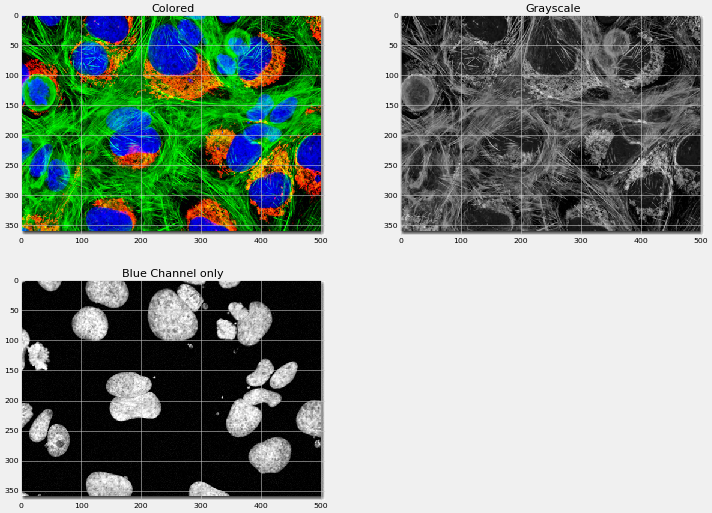

In [10]:
## 1. Testing select blue channel only as nuclei 
img, gimg = list(dict_cell_imagez.values())[1]
cimg = nuclei_channel_only( img )
grid_plot_images([img, gimg, cimg], ["Colored", "Grayscale", "Blue Channel only"])


------- Cell # 0 -------
image.shape = (504, 700)
datatype = uint8
min = 0 , max = 255


------- Cell # 1 -------
image.shape = (368, 508)
datatype = uint8
min = 0 , max = 255


------- Cell # 2 -------
image.shape = (900, 1200)
datatype = uint8
min = 0 , max = 255


------- Cell # 3 -------
image.shape = (194, 259)
datatype = uint8
min = 0 , max = 255


------- Cell # 4 -------
image.shape = (504, 700)
datatype = uint8
min = 0 , max = 255


------- Cell # 5 -------
image.shape = (368, 508)
datatype = uint8
min = 0 , max = 255



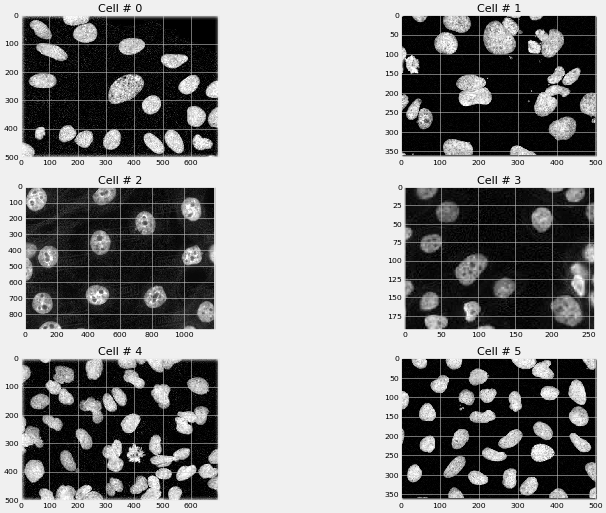

In [11]:
## 2. Now do for all cells in dict 
for k, g in dict_cell_imagez.items():
    dict_cell_imagez[k] = [*g, nuclei_channel_only(g[0])]
    
grid_plot_images( [x[2] for x in dict_cell_imagez.values() ], list(dict_cell_imagez.keys()) )


------- Cell # 0 -------
image.shape = (504, 700, 3)
datatype = float64
min = 0.0 , max = 1.0


------- Cell # 1 -------
image.shape = (368, 508, 3)
datatype = float64
min = 0.0 , max = 1.0


------- Cell # 2 -------
image.shape = (900, 1200, 3)
datatype = float64
min = 0.0 , max = 1.0


------- Cell # 3 -------
image.shape = (194, 259, 3)
datatype = float64
min = 0.0 , max = 1.0


------- Cell # 4 -------
image.shape = (504, 700, 3)
datatype = float64
min = 0.0 , max = 1.0


------- Cell # 5 -------
image.shape = (368, 508, 3)
datatype = float64
min = 0.0 , max = 1.0



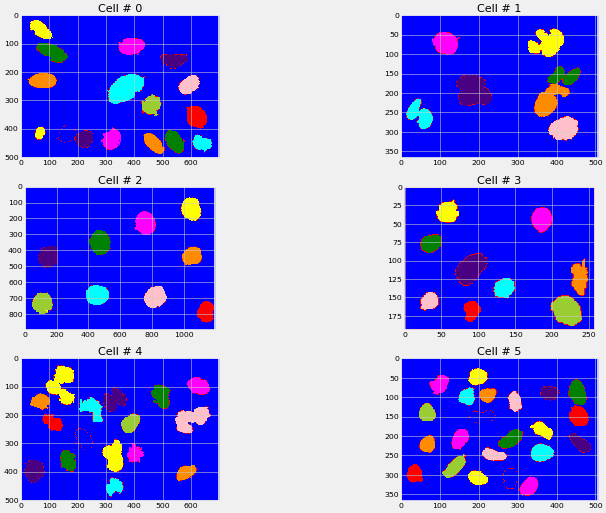

In [12]:
### 1. Clean Imagez
for k, g in dict_cell_imagez.items(): # 0 = color, 1 = grayscale , 2 = blue_channel_nuclei_only
    o = clean_prepare_binary(g[2], blursize=9)
    dict_cell_imagez[k] = [*g, o ]
    
### 2. Watershed segment
for k, g in dict_cell_imagez.items(): # 0 = color, 1 = grayscale , 2 = blue_channel_nuclei_only
    o, r = watershed_segment(g[0], g[3], dilate_iterz=10, thresh_val=0.23, iterz=1)
    dict_cell_imagez[k] = [*g, (o,r)]
    
grid_plot_images( [ x[4][1] for x in dict_cell_imagez.values()] , list(dict_cell_imagez.keys()) )


In [13]:
### 3. Generate properties dataframe
df_propz = []
for k, g in dict_cell_imagez.items():
    df_propz.append( *gen_properties( g[4][0], g[2]))
#     print( ">>>>", df_propz, "\n\n")
    
cell_analysis_df = pd.DataFrame.from_records( df_propz , columns=region_propz+propz_addz)

print( grain_analysis_df.shape )
cell_analysis_df.head(3)

(4, 16)


,Label,Area,Perimeter,equivalent_diameter,orientation,MajorAxisLength,MinorAxisLength,MinIntensity,MaxIntensity,MeanIntensity,Area_nm,Perimeter_nm,equivalent_diameter_nm,orientation_degrees,MajorAxisLength_nm,MinorAxisLength_nm
0,26,2750,250.663997,59.172703,1.234393,71.893416,50.489954,0,255,200.617818,687.50,125.331998,29.586351,70.725508,35.946708,25.244977
1,17,3491,262.285317,66.669928,-1.301430,76.878376,58.355780,0,255,157.918075,872.75,131.142659,33.334964,-74.566484,38.439188,29.177890
2,21,134,55.662951,13.061933,1.111416,19.469705,10.180959,117,170,142.119403,33.50,27.831475,6.530967,63.679479,9.734852,5.090479


In [14]:
np.round(cell_analysis_df.describe(), 1 )


,Label,Area,Perimeter,equivalent_diameter,orientation,MajorAxisLength,MinorAxisLength,MinIntensity,MaxIntensity,MeanIntensity,Area_nm,Perimeter_nm,equivalent_diameter_nm,orientation_degrees,MajorAxisLength_nm,MinorAxisLength_nm
count,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0
mean,23.5,1839.7,179.8,44.2,-0.1,52.4,38.9,34.0,240.8,172.7,459.9,89.9,22.1,-7.4,26.2,19.4
std,5.5,1354.9,95.0,21.7,1.1,24.0,19.9,53.5,34.7,22.6,338.7,47.5,10.8,61.7,12.0,9.9
min,17.0,134.0,55.7,13.1,-1.3,19.5,10.2,0.0,170.0,142.1,33.5,27.8,6.5,-74.6,9.7,5.1
25%,19.5,712.0,100.2,28.4,-0.9,33.7,24.6,0.0,255.0,159.2,178.0,50.1,14.2,-51.0,16.9,12.3
50%,23.5,2130.5,208.4,51.7,-0.4,59.7,44.7,0.0,255.0,170.3,532.6,104.2,25.9,-24.9,29.8,22.3
75%,26.0,2717.2,259.4,58.8,0.8,70.2,54.2,65.2,255.0,190.7,679.3,129.7,29.4,45.6,35.1,27.1
max,32.0,3491.0,265.7,66.7,1.2,76.9,58.4,117.0,255.0,200.6,872.8,132.8,33.3,70.7,38.4,29.2


In [15]:
## 4. More clean up - Can remove outliers b/c of overlapping cells for example and any remaining noise????
# E.G. filter at diameter above 75th or something 

-----
## 2.3 Yet Another Cell-set analysis

IP at 0 is okay
IP at 1 is okay
IP at 2 is okay
IP at 3 is okay

------- Cell # 0 -------
image.shape = (512, 512, 3)
datatype = uint8
min = 0 , max = 255


------- Cell # 1 -------
image.shape = (190, 266, 3)
datatype = uint8
min = 0 , max = 255


------- Cell # 2 -------
image.shape = (536, 800, 3)
datatype = uint8
min = 0 , max = 255


------- Cell # 3 -------
image.shape = (475, 659, 3)
datatype = uint8
min = 0 , max = 255



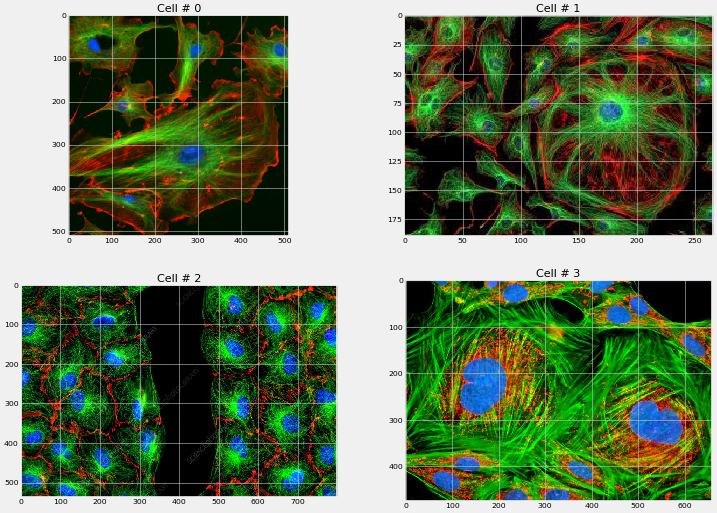

In [16]:
pathz_cell_imagez = [
    "https://s3-us-west-2.amazonaws.com/courses-images/wp-content/uploads/sites/1950/2017/05/31183143/fluorescentcells.jpeg",
    "https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcQsIj_Whunwa_KVi74CJHYD6j23FN40EEm1elDmF1-u0UW8LQF-&usqp=CAU",
    "https://media.sciencephoto.com/image/c0088380/800wm", ## SCAR SASSY
    "https://www.researchgate.net/profile/Elmar_Yusifli/publication/329146452/figure/fig1/AS:697545412055040@1543319194016/A-fluorescent-image-of-tissue-cells-in-culture-using-triple-fluophore-combination-of.jpg",
    
]

dict_cell_imagez = {}

for i, ip in enumerate(pathz_cell_imagez):
    c, g = fetch_image( ip )
    print(f"IP at {i} is okay")
    dict_cell_imagez[f"Cell # {i}"] = (c, g )
    

grid_plot_images( [x[0] for x in dict_cell_imagez.values() ], list(dict_cell_imagez.keys()) )



------- Cell # 0 -------
image.shape = (512, 512)
datatype = uint8
min = 0 , max = 255


------- Cell # 1 -------
image.shape = (190, 266)
datatype = uint8
min = 0 , max = 211


------- Cell # 2 -------
image.shape = (536, 800)
datatype = uint8
min = 0 , max = 255


------- Cell # 3 -------
image.shape = (475, 659)
datatype = uint8
min = 0 , max = 255



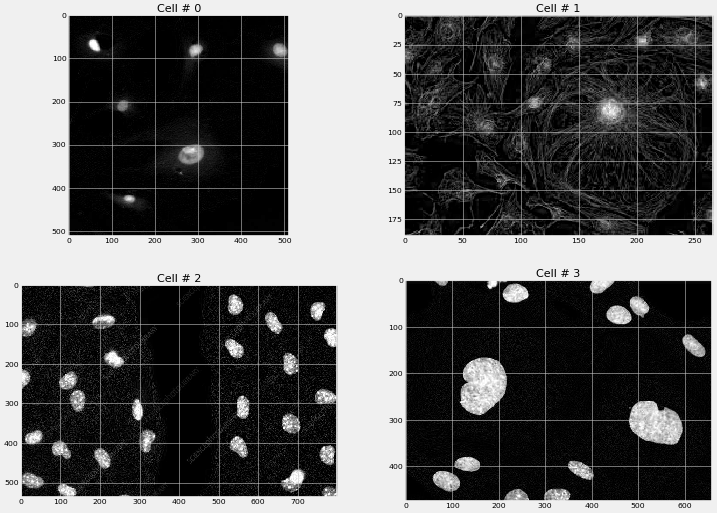

In [17]:
## 2. Now do for all cells in dict 
for k, g in dict_cell_imagez.items():
    dict_cell_imagez[k] = [*g, nuclei_channel_only(g[0])]
    
grid_plot_images( [x[2] for x in dict_cell_imagez.values() ], list(dict_cell_imagez.keys()) )


------- Cell # 0 -------
image.shape = (512, 512, 3)
datatype = float64
min = 0.0 , max = 1.0


------- Cell # 1 -------
image.shape = (190, 266, 3)
datatype = float64
min = 0.0 , max = 1.0


------- Cell # 2 -------
image.shape = (536, 800, 3)
datatype = float64
min = 0.0 , max = 1.0


------- Cell # 3 -------
image.shape = (475, 659, 3)
datatype = float64
min = 0.0 , max = 1.0



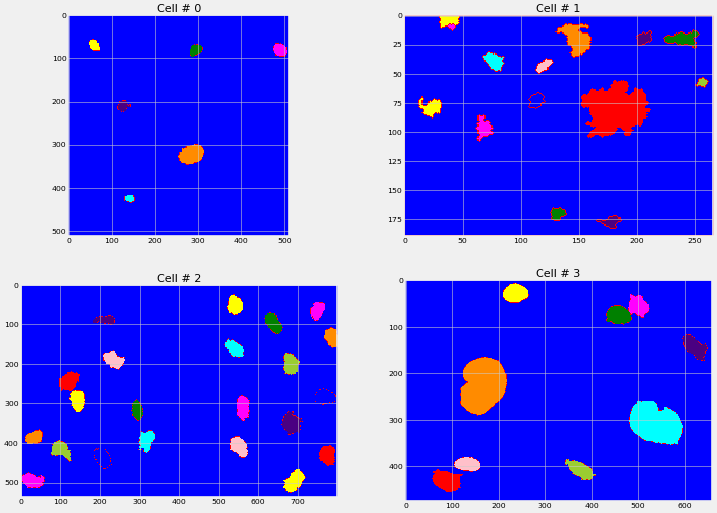

In [18]:
### 1. Clean Imagez
for k, g in dict_cell_imagez.items(): # 0 = color, 1 = grayscale , 2 = blue_channel_nuclei_only
    o = clean_prepare_binary(g[2], blursize=9)
    dict_cell_imagez[k] = [*g, o ]
    
### 2. Watershed segment
for k, g in dict_cell_imagez.items(): # 0 = color, 1 = grayscale , 2 = blue_channel_nuclei_only
    o, r = watershed_segment(g[0], g[3], dilate_iterz=10, thresh_val=0.23, iterz=1)
    dict_cell_imagez[k] = [*g, (o,r)]
    
grid_plot_images( [ x[4][1] for x in dict_cell_imagez.values()] , list(dict_cell_imagez.keys()) )


In [19]:
### 3. Generate properties dataframe
df_propz = []
for k, g in dict_cell_imagez.items():
    df_propz.append( *gen_properties( g[4][0], g[2]))
#     print( ">>>>", df_propz, "\n\n")
    
df = pd.DataFrame.from_records( df_propz , columns=region_propz+propz_addz)

print( df.shape )
df.head(3)

(4, 16)


,Label,Area,Perimeter,equivalent_diameter,orientation,MajorAxisLength,MinorAxisLength,MinIntensity,MaxIntensity,MeanIntensity,Area_nm,Perimeter_nm,equivalent_diameter_nm,orientation_degrees,MajorAxisLength_nm,MinorAxisLength_nm
0,16,306,76.526912,19.738574,1.456931,24.667920,16.246989,63,233,166.973856,76.50,38.263456,9.869287,83.476007,12.333960,8.123494
1,24,97,43.591883,11.113246,-1.453851,16.427670,9.264003,4,126,59.567010,24.25,21.795942,5.556623,-83.299563,8.213835,4.632001
2,32,1544,196.101551,44.338266,1.402081,60.246049,33.994566,0,255,149.833549,386.00,98.050776,22.169133,80.333358,30.123024,16.997283


In [20]:
np.round(df.describe(), 1 )

,Label,Area,Perimeter,equivalent_diameter,orientation,MajorAxisLength,MinorAxisLength,MinIntensity,MaxIntensity,MeanIntensity,Area_nm,Perimeter_nm,equivalent_diameter_nm,orientation_degrees,MajorAxisLength_nm,MinorAxisLength_nm
count,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0
mean,22.8,989.0,131.0,31.4,0.7,41.1,25.4,16.8,217.2,136.3,247.2,65.5,15.7,38.2,20.6,12.7
std,7.0,932.8,83.1,19.0,1.4,24.0,15.2,30.9,61.7,51.9,233.2,41.6,9.5,81.1,12.0,7.6
min,16.0,97.0,43.6,11.1,-1.5,16.4,9.3,0.0,126.0,59.6,24.2,21.8,5.6,-83.3,8.2,4.6
25%,18.2,253.8,68.3,17.6,0.6,22.6,14.5,0.0,206.2,127.3,63.4,34.1,8.8,33.3,11.3,7.3
50%,21.5,925.0,136.3,32.0,1.3,42.5,25.1,2.0,244.0,158.4,231.2,68.2,16.0,76.3,21.2,12.6
75%,26.0,1660.2,199.0,45.9,1.4,61.0,36.0,18.8,255.0,167.5,415.1,99.5,22.9,81.1,30.5,18.0
max,32.0,2009.0,207.7,50.6,1.5,63.2,41.9,63.0,255.0,168.9,502.2,103.8,25.3,83.5,31.6,20.9


In [21]:
cell_analysis_df = cell_analysis_df.append(  df)

print( cell_analysis_df.shape )

np.round( cell_analysis_df.describe(), 1)

(10, 16)


,Label,Area,Perimeter,equivalent_diameter,orientation,MajorAxisLength,MinorAxisLength,MinIntensity,MaxIntensity,MeanIntensity,Area_nm,Perimeter_nm,equivalent_diameter_nm,orientation_degrees,MajorAxisLength_nm,MinorAxisLength_nm
count,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0
mean,23.2,1499.4,160.3,39.1,0.2,47.9,33.5,27.1,231.4,158.2,374.8,80.1,19.5,10.9,24.0,16.7
std,5.8,1225.9,89.2,20.6,1.2,23.4,18.6,44.6,45.7,39.2,306.5,44.6,10.3,69.7,11.7,9.3
min,16.0,97.0,43.6,11.1,-1.5,16.4,9.3,0.0,126.0,59.6,24.2,21.8,5.6,-83.3,8.2,4.6
25%,19.0,330.0,76.9,20.5,-0.9,25.2,17.2,0.0,238.5,151.9,82.5,38.5,10.2,-51.0,12.6,8.6
50%,22.5,1593.0,181.2,45.0,0.5,57.2,36.4,0.0,255.0,165.0,398.2,90.6,22.5,27.6,28.6,18.2
75%,26.0,2466.5,239.9,56.0,1.3,64.7,48.3,48.2,255.0,175.5,616.6,120.0,28.0,71.8,32.3,24.2
max,32.0,3491.0,265.7,66.7,1.5,76.9,58.4,117.0,255.0,200.6,872.8,132.8,33.3,83.5,38.4,29.2
